In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 8267_a0801_1996_comp.las to 8267_a0801_1996_comp.las
Saving 210915_IOA_07_BDC-2-04_TD_695.las to 210915_IOA_07_BDC-2-04_TD_695.las
Saving 210916_IOA_08_BDC-2-04_TD_695.las to 210916_IOA_08_BDC-2-04_TD_695.las
Saving 210917_IOA_09_BDC-2-04_TD_1171.las to 210917_IOA_09_BDC-2-04_TD_1171.las
Saving 210918_IOA_10_BDC-2-04_TD_1551.las to 210918_IOA_10_BDC-2-04_TD_1551.las
Saving 210919_IOA_11_BDC-2-04_TD_2047.las to 210919_IOA_11_BDC-2-04_TD_2047.las
Saving 210920_IOA_12_BDC-2-04_TD_2261.las to 210920_IOA_12_BDC-2-04_TD_2261.las
Saving 210921_IOA_13_BDC-2-04_TD_2327.las to 210921_IOA_13_BDC-2-04_TD_2327.las
Saving 210922_IOA_14_BDC-2-04_TD_2462.las to 210922_IOA_14_BDC-2-04_TD_2462.las
Saving 210923_IOA_15_BDC-2-04_TD_2516.las to 210923_IOA_15_BDC-2-04_TD_2516.las
Saving 210924_IOA_16_BDC-2-04_TD_2516.las to 210924_IOA_16_BDC-2-04_TD_2516.las
Saving Barossa-6_24hrs Time Ascii_010517.LAS to Barossa-6_24hrs Time Ascii_010517.LAS
Saving Barossa-6_24hrs Time Ascii_020517.LAS to Barossa-6_

In [18]:
import pandas as pd
import lasio

def read_las_files(file_list):
    dfs=pd.DataFrame()
    file_path = 'Data/LAS/'
    file_path = ''
    for file in file_list:
        well = lasio.read(file_path + file)
        df = well.df()
        dfs=pd.concat([dfs, df], ignore_index=True)
    return dfs


file_list=['210915_IOA_07_BDC-2-04_TD_695.las','210916_IOA_08_BDC-2-04_TD_695.las','210917_IOA_09_BDC-2-04_TD_1171.las','210918_IOA_10_BDC-2-04_TD_1551.las',
        '210919_IOA_11_BDC-2-04_TD_2047.las','210920_IOA_12_BDC-2-04_TD_2261.las']
df=read_las_files(file_list)

In [19]:
print("Column Names:")
print(df.columns)

Column Names:
Index(['HDEP', 'HDTVD', 'LAGDEPTH', 'BPOS', 'TFHA', 'TFBA', 'FTAA', 'FRSA',
       'RPMTOTAL', 'SPP1', 'SPP2', 'FRPI', 'P1RT', 'P2RT', 'P3RT', 'P4RT',
       'CSTK', 'FFIA', 'HOB', 'FFOA', 'PITVOLTOTAL', 'AUXILARYTOTAL', 'DMIA',
       'TMIA', 'CMIA', 'CVE1CORDENS', 'TMOA', 'CMOA', 'TRIPTANK', 'FGHA',
       '1C1', '1C2', '1C3', '1C4I', '1C4N', '1C5I', '1C5O', 'GASHYDNINAVG',
       '2C1', '2C2', '2C3', '2C4I', '2C4N', '2C5O', '2C5I', 'TFCP', 'DI01',
       'DI02', 'DI03', 'DI04'],
      dtype='object')


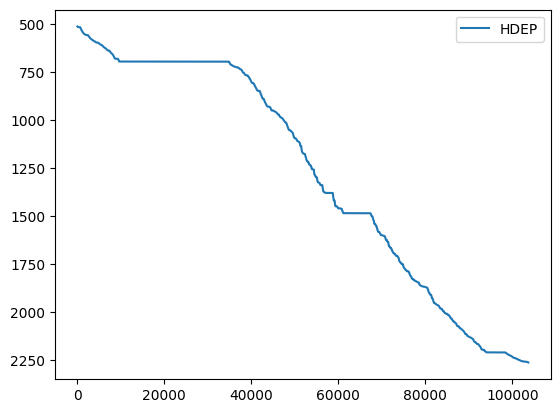

In [20]:
import matplotlib.pyplot as plt

ax=df.plot(y='HDEP',use_index=True)
ax.invert_yaxis()
plt.show()

In [9]:
df['HDEP'].is_monotonic_increasing

False

Original DataFrame:
           HDEP    HDTVD  LAGDEPTH   BPOS   TFHA  TFBA  FTAA  FRSA  RPMTOTAL  \
0        512.62   512.61    512.62   5.52  179.6  13.8   4.2  98.0      98.0   
1        512.65   512.65    512.65   5.50  179.7  13.5   3.1  98.0      98.0   
2        512.65   512.65    512.65   5.56  176.7  16.6   4.1  98.0      98.0   
3        512.65   512.65    512.65   5.52  180.4  13.1   3.9  98.0      98.0   
4        512.65   512.65    512.65   5.50  179.5  13.8   3.1  98.0      98.0   
...         ...      ...       ...    ...    ...   ...   ...   ...       ...   
103681  2260.75  2217.84   2255.35  18.35  325.0   9.5   9.1  79.0     209.0   
103682  2260.75  2217.84   2255.38  18.22  323.4  11.2  10.1  79.0     209.0   
103683  2260.77  2217.85   2255.42  18.28  326.8   7.8   9.3  80.0     209.0   
103684  2260.77  2217.85   2255.42  18.28  321.5  12.8   9.1  79.0     209.0   
103685  2260.78  2217.87   2255.50  18.18  324.3  10.3   9.8  79.0     208.0   

          SPP1  ...

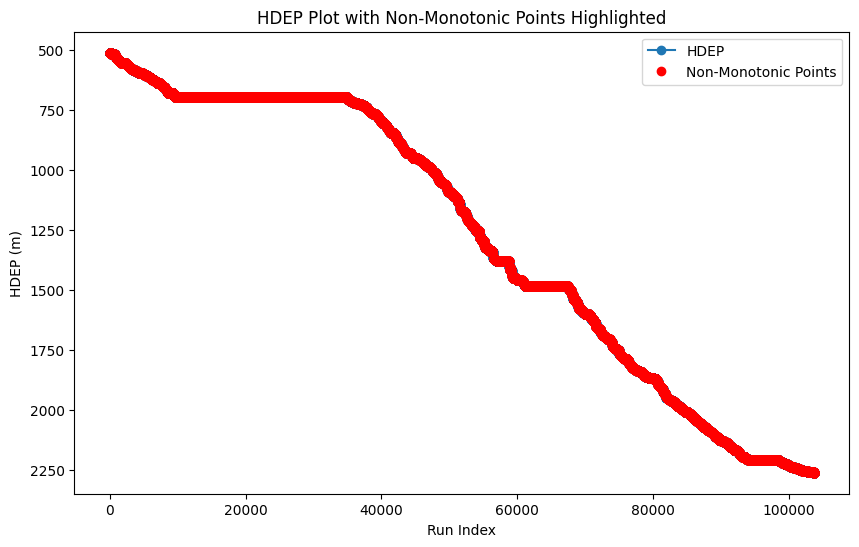

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with 'HDEP' values (Hole Depth)
data = {
    'Index': range(1, 11),
    'HDEP': [1000, 1050, 1100, 1080, 1150, 1200, 1190, 1250, 1300, 1280]
}

# Create the DataFrame
#df = pd.DataFrame(data)
#df.set_index('Index', inplace=True)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Identify non-monotonic increasing points
# A point is non-monotonic if it is less than or equal to the previous point
non_monotonic_mask = df['HDEP'] <= df['HDEP'].shift(1)

# Display the mask
print("\nNon-Monotonic Mask:")
print(non_monotonic_mask)

# Plotting 'HDEP'
ax = df.plot(y='HDEP', use_index=True, label='HDEP', figsize=(10, 6), marker='o')

# Highlight the non-monotonic points
ax.plot(df.index[non_monotonic_mask], df['HDEP'][non_monotonic_mask], 'ro', label='Non-Monotonic Points')

# Invert the y-axis to represent depth correctly
ax.invert_yaxis()

# Add labels and title
ax.set_ylabel('HDEP (m)')
ax.set_xlabel('Run Index')
ax.set_title('HDEP Plot with Non-Monotonic Points Highlighted')

# Show legend
ax.legend()

# Display the plot
plt.show()


<Axes: ylabel='Density'>

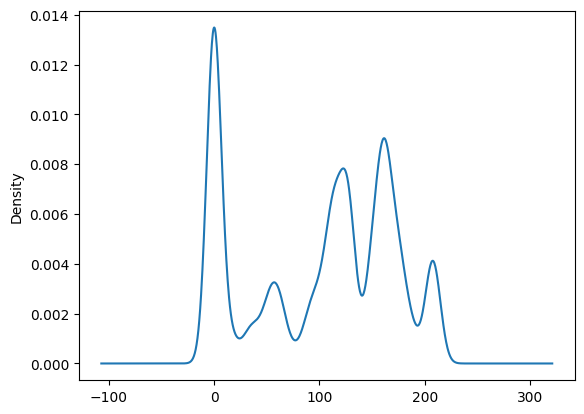

In [23]:
df['RPMTOTAL'].plot(kind='kde')

<Axes: ylabel='Density'>

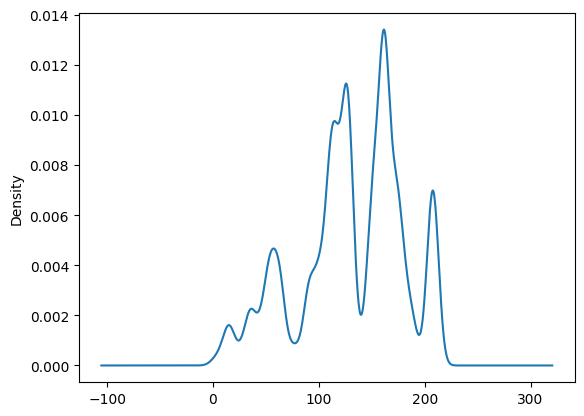

In [24]:
df_new = df.loc[df['RPMTOTAL'] > 0]
df_new['RPMTOTAL'].plot(kind='kde')

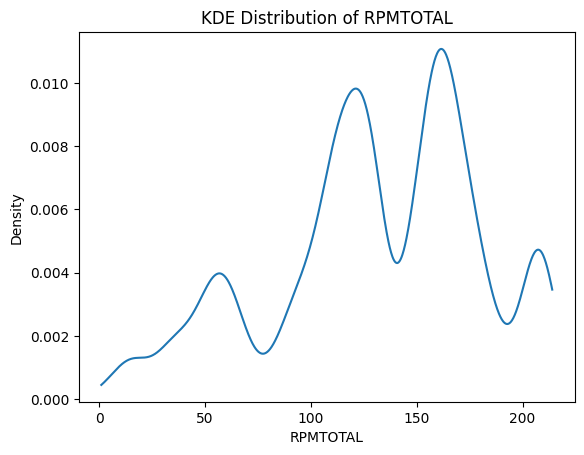

In [25]:
from sklearn.neighbors import KernelDensity

# Extract the RPMTOTAL column
rpmtotal = df_new['RPMTOTAL'].values.reshape(-1, 1)

# Fit the kernel density estimator
kde = KernelDensity(kernel='gaussian', bandwidth=8).fit(rpmtotal)

# Create a range of values to evaluate the estimator
x = np.linspace(rpmtotal.min(), rpmtotal.max(), 1000).reshape(-1, 1)

# Evaluate the estimator at the given values
y = np.exp(kde.score_samples(x))

# Plot the KDE distribution
plt.plot(x, y)
plt.xlabel('RPMTOTAL')
plt.ylabel('Density')
plt.title('KDE Distribution of RPMTOTAL')
plt.show()

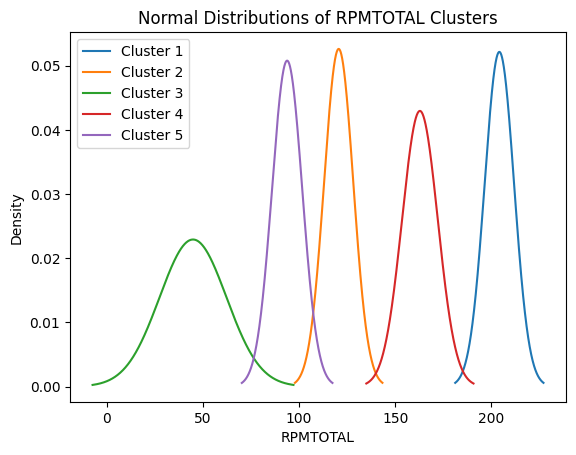

In [26]:
from sklearn.cluster import KMeans

# Fit the KMeans estimator
kmeans = KMeans(n_clusters=5,n_init=10).fit(rpmtotal)

# Get the cluster labels
labels = kmeans.labels_

# Get the indices of the clusters
cluster_indices = [np.where(labels == i)[0] for i in range(kmeans.n_clusters)]

# Segregate the clusters into smaller arrays
clusters = [rpmtotal[indices] for indices in cluster_indices]

# Plot the normal distributions for each array
for i, cluster in enumerate(clusters):
    mu, std = cluster.mean(), cluster.std()
    x = np.linspace(mu - 3 * std, mu + 3 * std, 1000)
    y = np.exp(-0.5 * ((x - mu) / std) ** 2) / (std * np.sqrt(2 * np.pi))
    plt.plot(x, y, label=f'Cluster {i+1}')
plt.xlabel('RPMTOTAL')
plt.ylabel('Density')
plt.title('Normal Distributions of RPMTOTAL Clusters')
plt.legend()
plt.show()


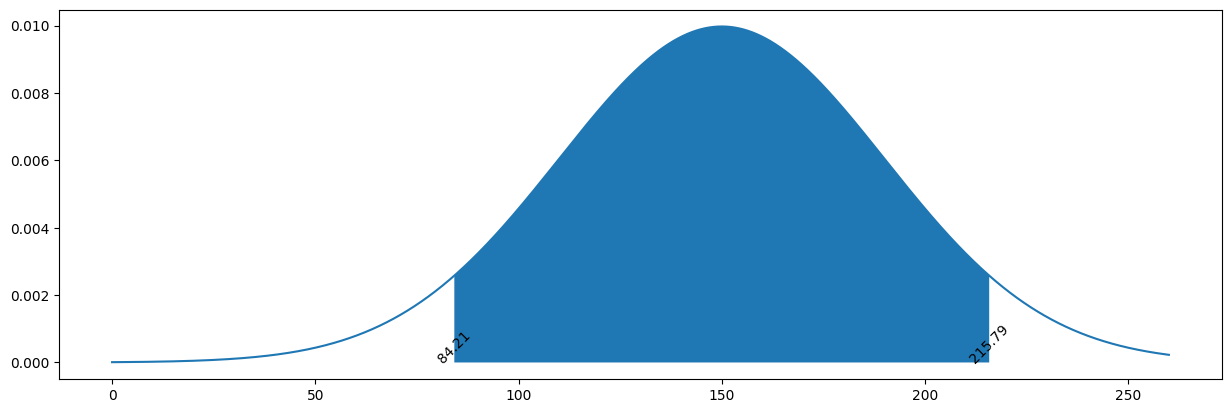

In [27]:
from scipy import stats

def plot_normal_distribution(mean, std, ci):
    x_axis = np.arange(0, 260, 0.001)
    pdf = stats.norm.pdf(x_axis, mean, std)

    fig, ax = plt.subplots()
    fig.set_figwidth(15) # Set the width of the figure to 10 inches
    ax.plot(x_axis, pdf)

    std_lim = stats.norm.ppf(1 - (1 - ci) / 2) # 95% CI
    low = mean - std_lim * std
    high = mean + std_lim * std

    ax.fill_between(x_axis, pdf, where=(low < x_axis) & (x_axis < high))
    ax.text(low, 0, f'{low:.2f}', ha='center',rotation=45)
    ax.text(high, 0, f'{high:.2f}', ha='center',rotation=45)

    plt.show()

plot_normal_distribution(150, 40, 0.90)

In [28]:
for i, cluster in enumerate(clusters):
    mu, std = cluster.mean(), cluster.std()
    print(f'Cluster {i+1}: Mean = {mu:.2f}, Standard Deviation = {std:.2f}')

Cluster 1: Mean = 204.18, Standard Deviation = 7.65
Cluster 2: Mean = 120.62, Standard Deviation = 7.58
Cluster 3: Mean = 44.86, Standard Deviation = 17.41
Cluster 4: Mean = 162.86, Standard Deviation = 9.29
Cluster 5: Mean = 93.81, Standard Deviation = 7.86


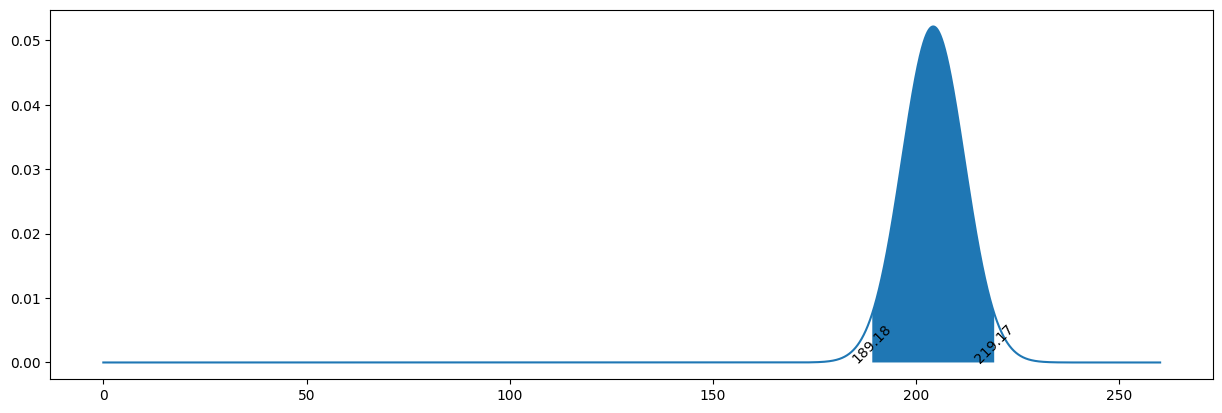

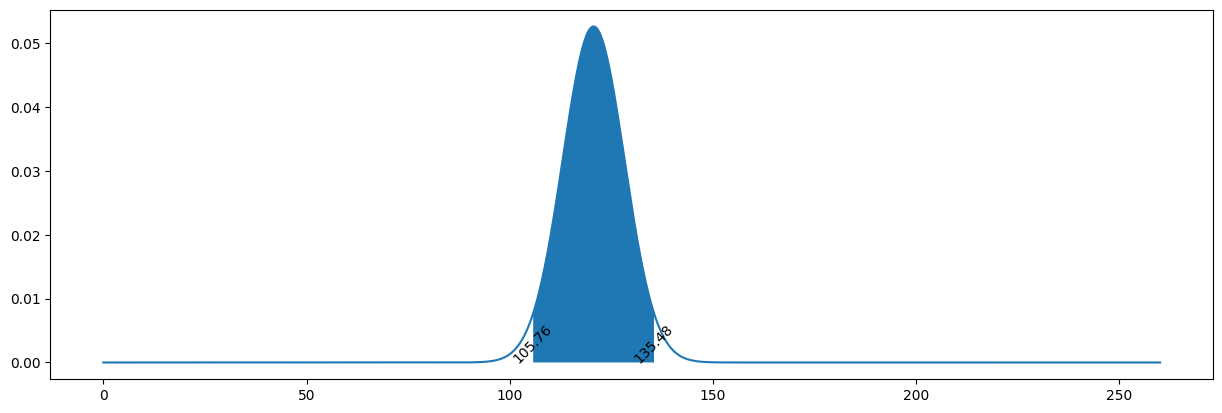

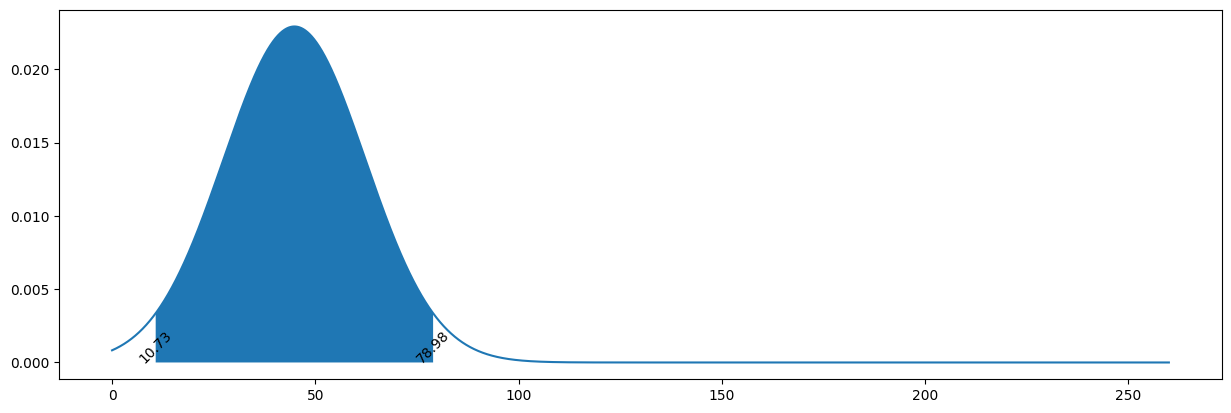

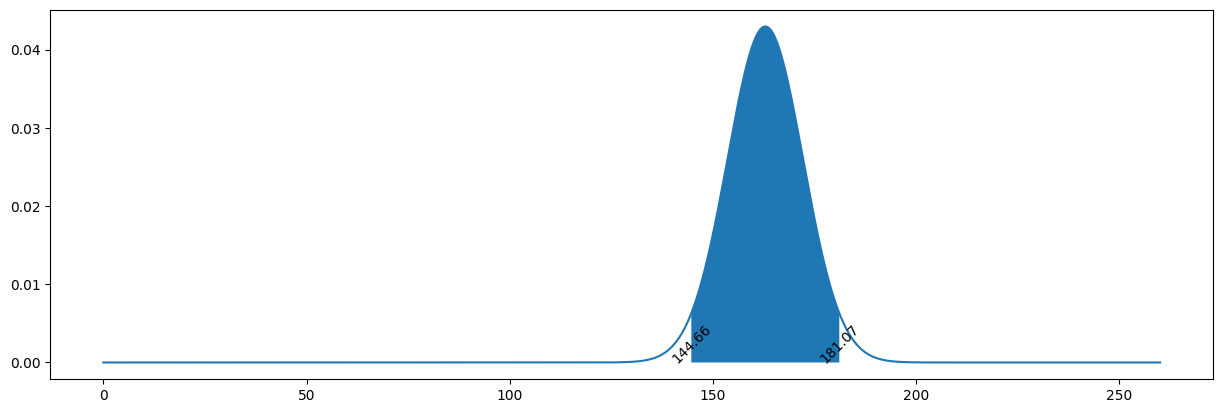

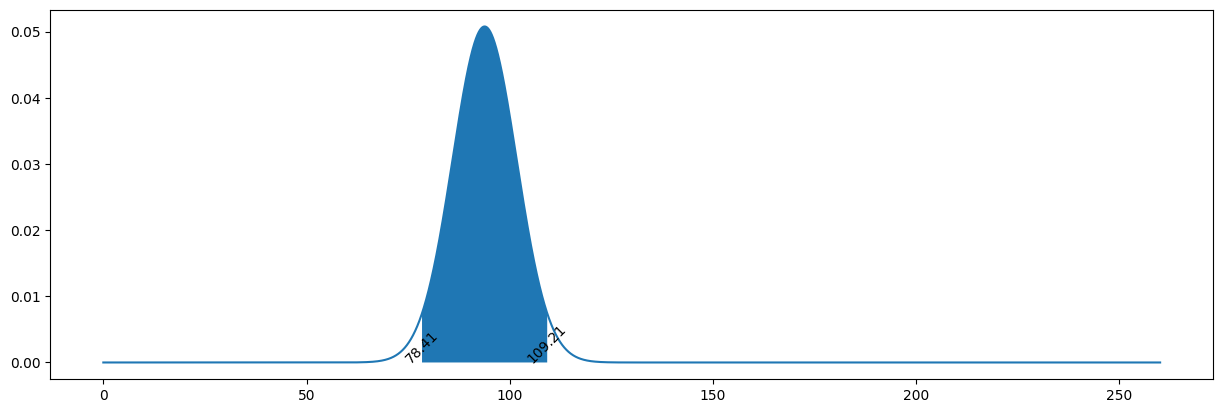

In [29]:
for i, cluster in enumerate(clusters):
    plot_normal_distribution(cluster.mean(), cluster.std(), 0.95)

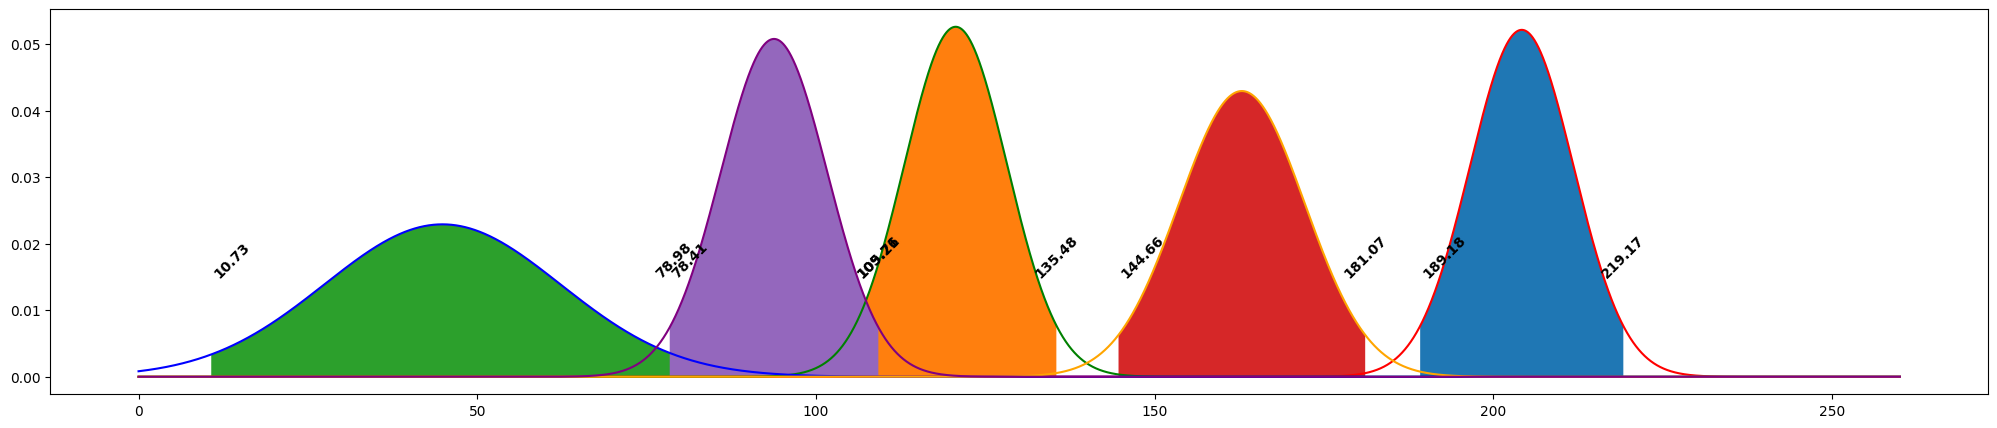

In [30]:
def plot_normal_distribution(mean, std, ci, color):
    x_axis = np.arange(0, 260, 0.001)
    pdf = stats.norm.pdf(x_axis, mean, std)

    ax.plot(x_axis, pdf, color=color)

    std_lim = stats.norm.ppf(1 - (1 - ci) / 2) # 95% CI
    low = mean - std_lim * std
    high = mean + std_lim * std

    ax.fill_between(x_axis, pdf, where=(low < x_axis) & (x_axis < high))
    ax.text(low, 0.015, f'{low:.2f}', ha='left', fontweight='bold', rotation=45)
    ax.text(high, 0.015, f'{high:.2f}', ha='center', fontweight='bold', rotation=45)

fig, ax = plt.subplots(figsize=(25, 5))

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, cluster in enumerate(clusters):
    plot_normal_distribution(cluster.mean(), cluster.std(), 0.95, colors[i % len(colors)])

plt.show()